In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification
License(s): CC0-1.0
100% 2.33M/2.33M [00:00<00:00, 4.47MB/s]
100% 2.33M/2.33M [00:00<00:00, 3.85MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/apples-or-tomatoes-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 294 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
10/10 [==============================] - 69s 7s/step - loss: 0.4681 - accuracy: 0.9456 - val_loss: 10.4443 - val_accuracy: 0.6289
Epoch 2/10
10/10 [==============================] - 69s 7s/step - loss: 0.4351 - accuracy: 0.9490 - val_loss: 12.2247 - val_accuracy: 0.5876
Epoch 3/10
10/10 [==============================] - 62s 6s/step - loss: 0.3216 - accuracy: 0.9524 - val_loss: 11.2315 - val_accuracy: 0.5876
Epoch 4/10
10/10 [==============================] - 62s 6s/step - loss: 0.4283 - accuracy: 0.9558 - val_loss: 13.2882 - val_accuracy: 0.6082
Epoch 5/10
10/10 [==============================] - 63s 6s/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 19.9165 - val_accuracy: 0.5567
Epoch 6/10
10/10 [==============================] - 61s 6s/step - loss: 0.3331 - accuracy: 0.9660 - val_loss: 20.4146 - val_accuracy: 0.5567
Epoch 7/10
10/10 [==============================] - 62s 6s/step - loss: 0.3964 - accuracy: 0.9694 - val_loss: 16.8084 - val_accuracy: 0.5670
Epoch 8/10
10

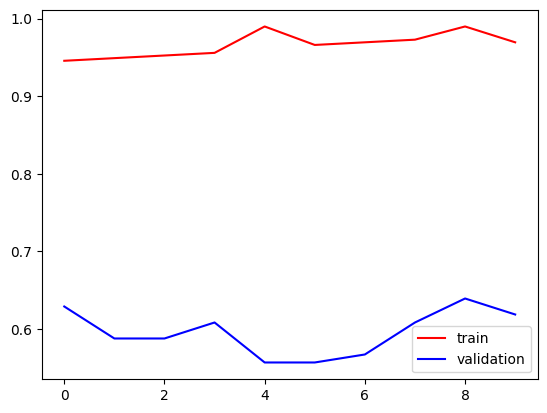

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

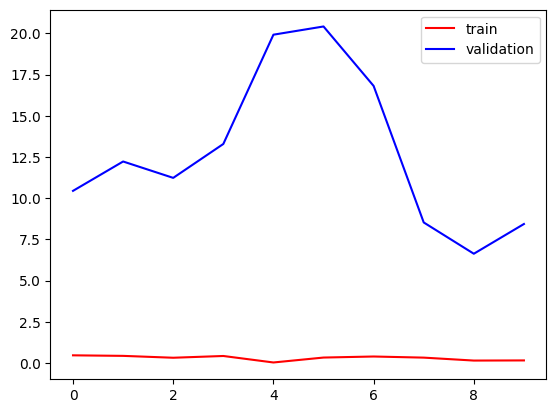

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

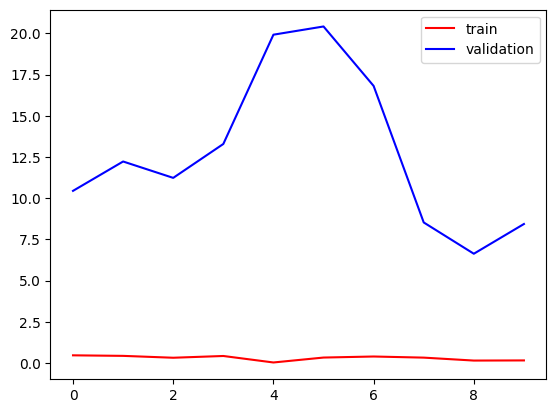

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
import cv2

In [33]:
test_img = cv2.imread('/content/1000_F_540623860_EgT9DUtfjrGSqxvd27G1h5yt2685fa2m.jpg')

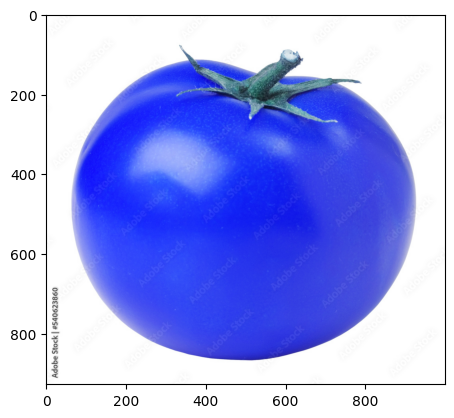

In [34]:
plt.imshow(test_img)

In [35]:
test_img.shape

(927, 1000, 3)

In [36]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [40]:
# Predict the class of the test input
h = model.predict(test_input)

# Since the output is a probability, we need to apply a threshold to determine the class
threshold = 0.5
if h < threshold:
    print("It's a tomato")
else:
    print("It's an apple")


1/1 [==============================] - 0s 69ms/step
It's a tomato
